In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [4]:
df.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


# catgorical variable

### 요일

In [5]:
def change_day(x):
    if x == '월':
        return 0
    elif x == '화':
        return 1
    elif x == '수':
        return 2
    elif x == '목':
        return 3
    elif x == '금':
        return 4
    
df['day'] = df['요일'].map(change_day)

In [6]:
df['day']

0       0
1       1
2       2
3       3
4       4
       ..
1200    2
1201    3
1202    4
1203    0
1204    1
Name: day, Length: 1205, dtype: int64

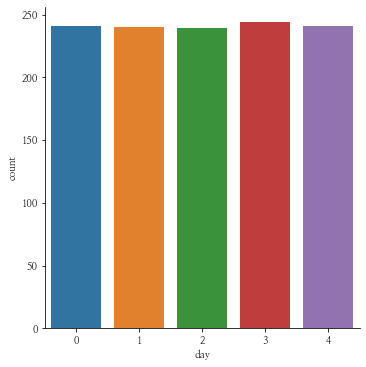

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='day', data=df, kind='count')
plt.show()

### 조식메뉴

In [8]:
df['조식메뉴'].head(2)

0    모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...
1    모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...
Name: 조식메뉴, dtype: object

In [16]:
df['조식메뉴'].map(lambda x: [c.split('/') for c in x.split()])

0       [[모닝롤, 찐빵], [우유, 두유, 주스], [계란후라이], [호두죽, 쌀밥], ...
1       [[모닝롤, 단호박샌드], [우유, 두유, 주스], [계란후라이], [팥죽, 쌀밥]...
2       [[모닝롤, 베이글], [우유, 두유, 주스], [계란후라이], [표고버섯죽, 쌀밥...
3       [[모닝롤, 토마토샌드], [우유, 두유, 주스], [계란후라이], [닭죽, 쌀밥]...
4       [[모닝롤, 와플], [우유, 두유, 주스], [계란후라이], [쇠고기죽, 쌀밥],...
                              ...                        
1200    [[모닝롤, 페퍼로니피자], [우유, 주스], [계란후라이, 찐계란], [크루통크림...
1201    [[모닝롤, 생크림단팥빵], [우유, 주스], [계란후라이, 찐계란], [누룽지탕,...
1202    [[모닝롤, BLT샌드위치], [우유, 주스], [계란후라이, 찐계란], [흑임자죽...
1203    [[모닝롤, 호박고구마오븐구이], [우유, 주스], [계란후라이, 찐계란], [누룽...
1204    [[모닝롤, 야채샌드], [우유, 주스], [계란후라이, 찐계란], [참치죽, 흑미...
Name: 조식메뉴, Length: 1205, dtype: object

In [49]:
def split_items(x):
    ret = []
    for item in x.split():
        for c in item.split('/'):
            c = c.strip()
            try:
                if c[0] == '(' and c[-1] == ')':
                    continue
                else:
                     ret.append(c)
            except:
                pass
    return ret

In [50]:
df['morning_menu'] = df['조식메뉴'].map(split_items)

In [53]:
from keras.preprocessing.text import Tokenizer

In [54]:
tokenizer = Tokenizer()

In [55]:
tokenizer.fit_on_texts(df['morning_menu'])

In [57]:
len(tokenizer.index_word)

781

In [71]:
sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

[('우유', 1205),
 ('주스', 1205),
 ('모닝롤', 1200),
 ('포기김치', 1193),
 ('쌀밥', 1079),
 ('계란후라이', 931),
 ('누룽지탕', 426),
 ('스크램블에그', 241),
 ('흑미밥', 125),
 ('양상추샐러드', 118)]

### 중식메뉴

In [59]:
df['lunch_menu'] = df['중식메뉴'].map(split_items)

In [60]:
t2 = Tokenizer()

In [61]:
t2.fit_on_texts(df['lunch_menu'])

In [62]:
len(t2.index_word)

1673

In [72]:
sorted(t2.word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

[('쌀밥', 1002),
 ('잡곡밥', 879),
 ('포기김치', 869),
 ('찰현미밥', 118),
 ('배추겉절이', 98),
 ('흑미밥', 74),
 ('열무김치', 67),
 ('깍두기', 63),
 ('알타리김치', 54),
 ('맑은국', 46)]

### 석식메뉴

In [58]:
df['dinner_menu'] = df['석식메뉴'].map(split_items)

In [64]:
t3 = Tokenizer()
t3.fit_on_texts(df['dinner_menu'])

In [65]:
len(t3.index_word)

1596

In [73]:
sorted(t3.word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

[('포기김치', 900),
 ('쌀밥', 663),
 ('잡곡밥', 657),
 ('흑미밥', 92),
 ('깍두기', 81),
 ('음료', 58),
 ('단무지', 52),
 ('열무김치', 50),
 ('알타리김치', 44),
 ('무피클', 39)]

## Quantitative Variable

In [74]:
from matplotlib import rc 
rc('font',family='AppleGothic')

### 본사정원수

<AxesSubplot:ylabel='Frequency'>

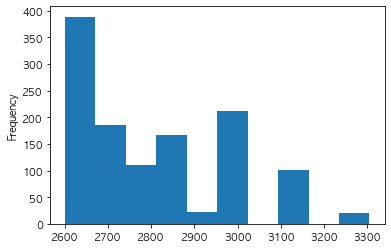

In [75]:
df['본사정원수'].plot(kind='hist')

<AxesSubplot:xlabel='day', ylabel='본사정원수'>

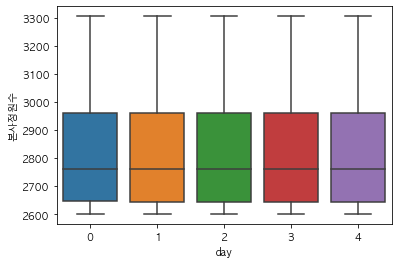

In [84]:
sns.boxplot(x=df['day'], y=df['본사정원수'])

### 본사휴가자수

<AxesSubplot:ylabel='Frequency'>

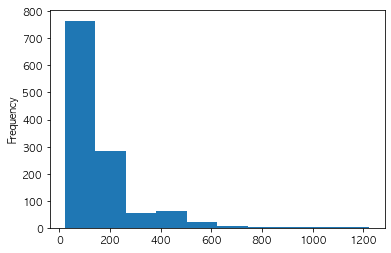

In [76]:
df['본사휴가자수'].plot(kind='hist')

<AxesSubplot:xlabel='day', ylabel='본사휴가자수'>

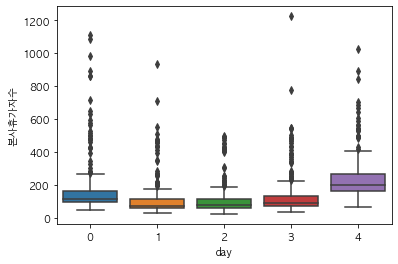

In [83]:
sns.boxplot(x=df['day'], y=df['본사휴가자수'])

### 본사출장자수

<AxesSubplot:ylabel='Frequency'>

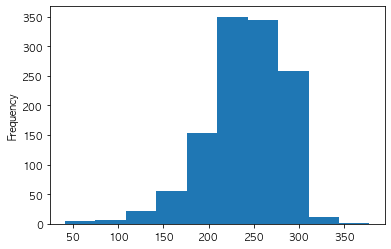

In [77]:
df['본사출장자수'].plot(kind='hist')

<AxesSubplot:xlabel='day', ylabel='본사출장자수'>

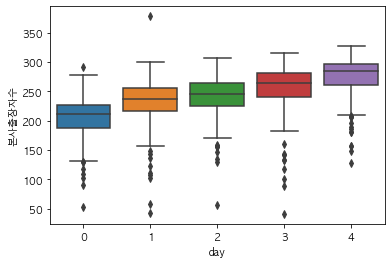

In [82]:
sns.boxplot(x=df['day'], y=df['본사출장자수'])

### 본사시간외근무명령서승인건수

<AxesSubplot:ylabel='Frequency'>

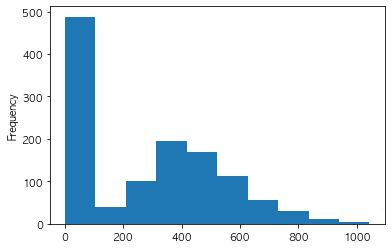

In [78]:
df['본사시간외근무명령서승인건수'].plot(kind='hist')

<AxesSubplot:xlabel='day', ylabel='본사시간외근무명령서승인건수'>

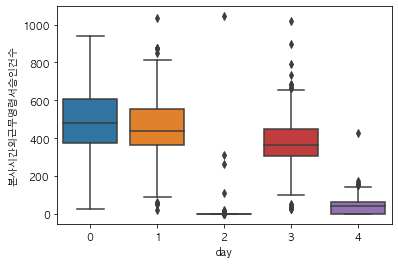

In [81]:
sns.boxplot(x=df['day'], y=df['본사시간외근무명령서승인건수'])

### 현본사소속재택근무자수

<AxesSubplot:ylabel='Frequency'>

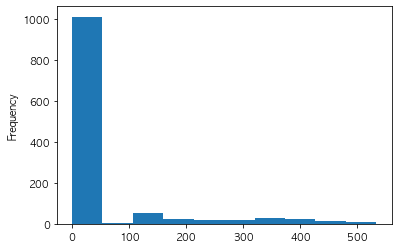

In [79]:
df['현본사소속재택근무자수'].plot(kind='hist')

In [86]:
df['현본사소속재택근무자수'].describe()

count    1205.000000
mean       43.506224
std       109.937400
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       533.000000
Name: 현본사소속재택근무자수, dtype: float64

1205 개의 일자중 988 개의 날짜에는 재택근무자가 없었다  
재택근무자수와 상관없이 중식계 석식계 값이 나타나는 것 같다...

In [87]:
len(df.loc[df['현본사소속재택근무자수']==0])

988

In [91]:
df.loc[df['현본사소속재택근무자수']==0].loc[:,['중식계', '석식계']]

,중식계,석식계
0,1039.0,331.0
1,867.0,560.0
2,1017.0,573.0
3,978.0,525.0
4,925.0,330.0
...,...,...
989,826.0,542.0
990,627.0,380.0
991,1282.0,767.0
992,1238.0,776.0


In [93]:
df.loc[df['현본사소속재택근무자수']==0].loc[:,['중식계', '석식계']].describe()

,중식계,석식계
count,988.000000,988.000000
mean,890.261134,469.058704
std,207.017031,139.490507
min,296.000000,0.000000
25%,760.000000,421.000000
50%,878.000000,492.000000
75%,1026.500000,550.000000
max,1459.000000,905.000000


In [92]:
df.loc[df['현본사소속재택근무자수']>0].loc[:,['중식계', '석식계']]

,중식계,석식계
958,1133.0,389.0
959,904.0,490.0
960,740.0,321.0
961,773.0,474.0
962,573.0,320.0
...,...,...
1200,1093.0,421.0
1201,832.0,353.0
1202,579.0,217.0
1203,1145.0,502.0


In [94]:
df.loc[df['현본사소속재택근무자수']>0].loc[:,['중식계', '석식계']].describe()

,중식계,석식계
count,217.000000,217.000000
mean,890.668203,428.599078
std,220.976998,133.100424
min,358.000000,0.000000
25%,746.000000,339.000000
50%,880.000000,424.000000
75%,1040.000000,501.000000
max,1405.000000,771.000000


<AxesSubplot:>

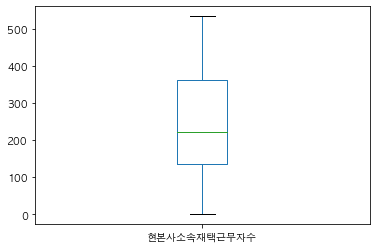

In [85]:
df['현본사소속재택근무자수'].loc[df['현본사소속재택근무자수'] > 0].plot(kind='box')

<AxesSubplot:xlabel='day', ylabel='현본사소속재택근무자수'>

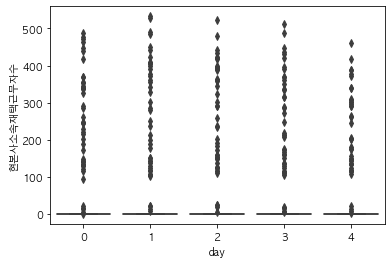

In [80]:
sns.boxplot(x=df['day'], y=df['현본사소속재택근무자수'])

## timestep, 주기 확인